In [1]:
import sys; sys.path.append('/sj0243/')

In [2]:
from python_for_nustar.nu_core import np, plt, os, glob, scan_phase_resolved_products, reduce_list, create_dir, pd, make_grppha_and_wd
from python_for_nustar.nu_class import NustarObservation
from python_for_nustar.pipeline.sj0243_init import Nu_path, ObsList
from python_for_nustar.pyxspec_lib.definitions import Model, Xset, AllModels, Fit, Plot, AllData, AllModels, xspec, showmodel
from python_for_nustar.pyxspec_lib.nustar_xspec import fit_spectra, ph_res_param, query_par, scan_containers_ph_res, plot_ph_res_storage
from python_for_nustar.pyxspec_lib.storage import Container, Storage
#prodpath_ph_res = 'phase_resolved' 
prod_shift = 0
ObsID = ObsList[2] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
ph_ave_folder = nu_obs.products_path+'/spe_and_lc'
ph_res_folder = nu_obs.products_path+'/phase_resolved'
model_name = 'relxilllp'
AllModels.lmod('relxill', '/sj0243/python_for_nustar/relxill_model/')
calc_errors = True

AllModels.clear()
Xset.parallel.error = 22



pd.set_option('display.max_columns', 500)


###
Observation 90302319006 loaded successfully


## Phase-averaged spectra

deleted xspec/relxilllp/*90302319006_relxilllp* and xspec/relxilllp/xcm/*90302319006_relxilllp* files
Try loading storage xspec/relxilllp/90302319006_relxilllp.storage
no storage found. fitting...
 loaded spe_and_lcA_sr.pi and spe_and_lcB_sr.pi from /sj0243/results/out90302319006/products/spe_and_lc
fitting done
skipping errors for: []
    18     0.990035     0.993149    (-0.00155521,0.00155885)
     3      1.41824      1.46145    (-0.0204558,0.0227585)
     4      532.215      703.861    (-81.6232,90.023)
     8      48.0885      58.5745    (-4.95632,5.52968)
    11      1.28867      1.34526    (-0.0297849,0.0268144)
    12      3.65425      3.71727    (-0.027257,0.0357644)
    14      19.9091      20.9749    (-0.545877,0.519904)
Apparent non-monotonicity in statistic space detected.
Current bracket values 0.228479, 0.228469
and delta stat 2.69714, 2.75666
but latest trial 0.228475 gives 2.77894
Suggest that you check this result using the steppar command.
    15     0.228474     0.25

,N,srcID,comp,par,ipar,val,error_l,error_u,er_status,sigma,frozen,link
0,0,90302319006_relxilllp_FPMA,constant,factor,1,1.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
1,0,90302319006_relxilllp_FPMA,phabs,nH,2,0.800000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
2,0,90302319006_relxilllp_FPMA,bbodyrad,kT,3,1.438690,1.418235,1.461449,FFFFFFFFF,0.012763,False,
3,0,90302319006_relxilllp_FPMA,bbodyrad,norm,4,613.839772,532.214765,703.860961,FFFFFFFFF,50.215219,False,
4,0,90302319006_relxilllp_FPMA,relxilllp,h,5,5.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
5,0,90302319006_relxilllp_FPMA,relxilllp,a,6,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
6,0,90302319006_relxilllp_FPMA,relxilllp,Incl,7,10.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,
7,0,90302319006_relxilllp_FPMA,relxilllp,Rin,8,53.046437,48.088504,58.574507,FFFFFFFFF,3.348040,False,
8,0,90302319006_relxilllp_FPMA,relxilllp,Rout,9,58.351081,0.000000,0.000000,FFFFFTFFF,0.000000,False,= 1.1*p8
9,0,90302319006_relxilllp_FPMA,relxilllp,z,10,0.000000,0.000000,0.000000,FFFFFFFFF,0.000000,True,


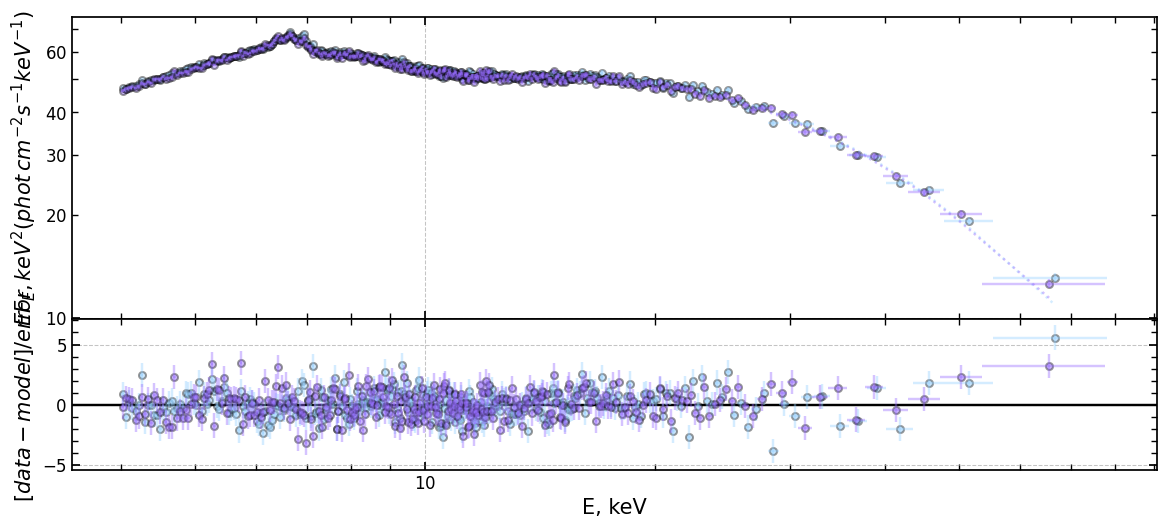

In [4]:
os.chdir(ph_ave_folder)
create_dir('xspec')



mo_cutoffpl = Model("constant*phabs*(bbodyrad+relxilllp)")
mo_cutoffpl.phabs.nH = '0.8 -1'



mo_cutoffpl.bbodyrad.kT = '1.43'
mo_cutoffpl.bbodyrad.norm = '600' # ,, 0.1, 0.2, 3, 4'



mo_cutoffpl.relxilllp.h = '5 -1'
mo_cutoffpl.relxilllp.a = '0 -1'
mo_cutoffpl.relxilllp.Incl = '10'
mo_cutoffpl.relxilllp.Incl.frozen = True
mo_cutoffpl.relxilllp.Rin = '70 0.1, 0, 0, 900, 900'
mo_cutoffpl.relxilllp.Rout = '=1.1*p8'
mo_cutoffpl.relxilllp.z = '0 -1'
mo_cutoffpl.relxilllp.gamma = '1.2  0.005 0.3 0.3 3 3'
mo_cutoffpl.relxilllp.logxi = '4'
mo_cutoffpl.relxilllp.Ecut = '20'
mo_cutoffpl.relxilllp.Ecut.frozen = False
mo_cutoffpl.relxilllp.refl_frac = '0.3'
mo_cutoffpl.relxilllp.fixReflFrac = '0'
mo_cutoffpl.relxilllp.Afe = '5 -1'


mo_fid_pars = fit_spectra(model = mo_cutoffpl, model_name = model_name, prefix = ObsID, dataset='spe_and_lc', min_bin='50', min_sig='50', rewrite = True, calc_errors = calc_errors, eqw_comps='')
mo_fid_pars

## Phase-resolved spectra

#### fit

In [3]:
xspec.Xset.restore(f'/sj0243/results/out{ObsID}/products/spe_and_lc/xspec/{model_name}/xcm/{ObsID}_{model_name}.xcm_model')

model = AllModels(1)
model.bbodyrad.kT.frozen = True
model.bbodyrad.norm.frozen = True
model.relxilllp.logxi.frozen = True
model.relxilllp.Rin.frozen = True


 *** loading RELXILL model (version 1.4.3) *** 


##################### bin number 6 #####################


rm: cannot remove 'xspec/relxilllp/*90302319006_bin6_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319006_bin6_shift0_relxilllp*': No such file or directory


deleted xspec/relxilllp/*90302319006_bin6_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319006_bin6_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319006_bin6_shift0_relxilllp.storage
no storage found. fitting...
 loaded phase_resolved_bin6A_sr.pi and phase_resolved_bin6B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
fitting done
skipping errors for: []
    18     0.989416     0.999439    (-0.00499896,0.00502402)
    11       1.1163      1.19946    (-0.0424543,0.0407086)
    14      14.5697      15.8992    (-0.640233,0.689268)
    15     0.316539     0.371143    (-0.026936,0.0276676)
    17     0.394129     0.428627    (-0.0169887,0.0175086)
Fit done 
 chi2 = 1274.2169148325665 for 1209 dof, chi2_red = 1.053942857595175, H0 prob = 0.09397892903
<Storage with 2 containers>
##################### bin number 7 #####################
deleted xspec/relxilllp/*90302319006_bin7_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319006_bin7_shift0_relxilllp* 

rm: cannot remove 'xspec/relxilllp/*90302319006_bin7_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319006_bin7_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin7A_sr.pi and phase_resolved_bin7B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
fitting done
skipping errors for: []
    18     0.981321     0.991123    (-0.00488591,0.00491625)
    11      1.36634      1.40405    (-0.0194972,0.0182074)
    14      18.9365      20.0435    (-0.542307,0.564707)
    15     0.192671     0.225758    (-0.0162596,0.0168274)
    17     0.787913     0.831624    (-0.0211923,0.022519)
Fit done 
 chi2 = 1217.0007674080766 for 1252 dof, chi2_red = 0.9720453413802529, H0 prob = 0.7557500221
<Storage with 2 containers>
##################### bin number 8 #####################
deleted xspec/relxilllp/*90302319006_bin8_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319006_bin8_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319006_bin8_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90302319006_bin8_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319006_bin8_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin8A_sr.pi and phase_resolved_bin8B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
fitting done
skipping errors for: []
    18     0.985635     0.995618    (-0.00497882,0.00500369)
    11      1.22935      1.30558    (-0.0392963,0.0369257)
    14      15.0272      16.3335    (-0.637862,0.66841)
    15     0.282925     0.334231    (-0.0251363,0.0261691)
    17     0.486705     0.531021    (-0.02199,0.0223257)
Fit done 
 chi2 = 1265.6455210214297 for 1184 dof, chi2_red = 1.0689573657275588, H0 prob = 0.04902887211
<Storage with 2 containers>
##################### bin number 9 #####################
deleted xspec/relxilllp/*90302319006_bin9_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319006_bin9_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319006_bin9_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90302319006_bin9_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319006_bin9_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin9A_sr.pi and phase_resolved_bin9B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
fitting done
skipping errors for: []
    18     0.984996     0.995043    (-0.00501144,0.0050364)
    11      1.07018       1.1604    (-0.0460138,0.0442085)
    14      13.5881      14.7921    (-0.578897,0.625112)
    15     0.399311     0.459579    (-0.0298469,0.0304219)
    17     0.347129     0.379265    (-0.0157804,0.0163559)
Fit done 
 chi2 = 1217.3400153645805 for 1181 dof, chi2_red = 1.0307705464560377, H0 prob = 0.2254609221
<Storage with 2 containers>
##################### bin number 10 #####################
deleted xspec/relxilllp/*90302319006_bin10_shift0_relxilllp* and xspec/relxilllp/xcm/*90302319006_bin10_shift0_relxilllp* files
Try loading storage xspec/relxilllp/90302319006_bin10_shift0_relxilllp.storage
no storage found. fitting...


rm: cannot remove 'xspec/relxilllp/*90302319006_bin10_shift0_relxilllp*': No such file or directory
rm: cannot remove 'xspec/relxilllp/xcm/*90302319006_bin10_shift0_relxilllp*': No such file or directory


 loaded phase_resolved_bin10A_sr.pi and phase_resolved_bin10B_sr.pi from /sj0243/results/out90302319006/products/phase_resolved
fitting done
skipping errors for: []
    18     0.981635     0.991403    (-0.00487244,0.0048964)
    11      1.35044      1.38797    (-0.0187365,0.0187919)
    14      20.0549      21.2929    (-0.603971,0.63401)
    15     0.193064      0.22621    (-0.0162109,0.0169352)
    17     0.890909      0.94209    (-0.025326,0.0258549)
Fit done 
 chi2 = 1283.234822231165 for 1282 dof, chi2_red = 1.0009631998683035, H0 prob = 0.4850257244
<Storage with 2 containers>


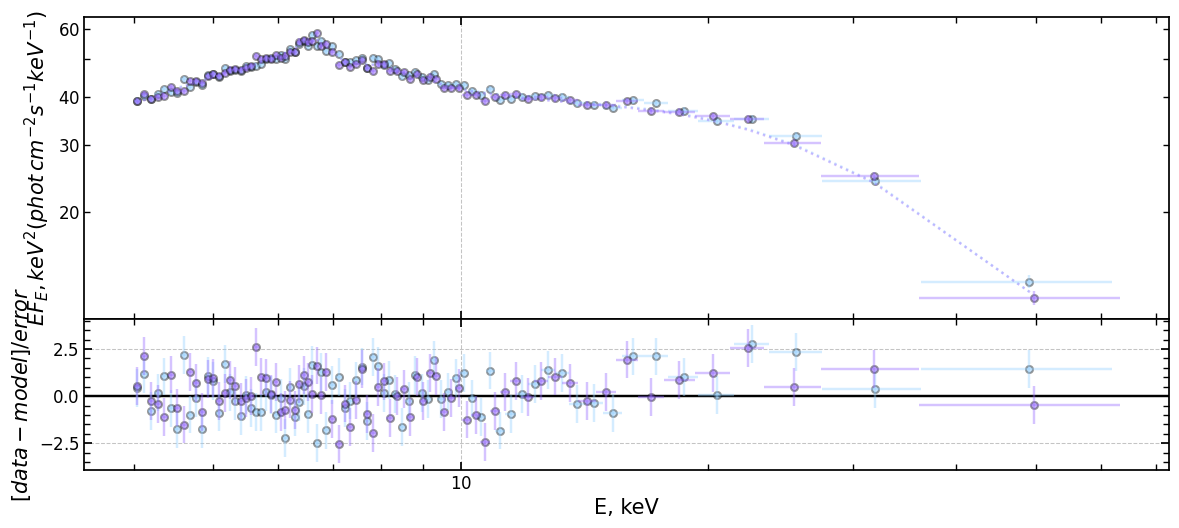

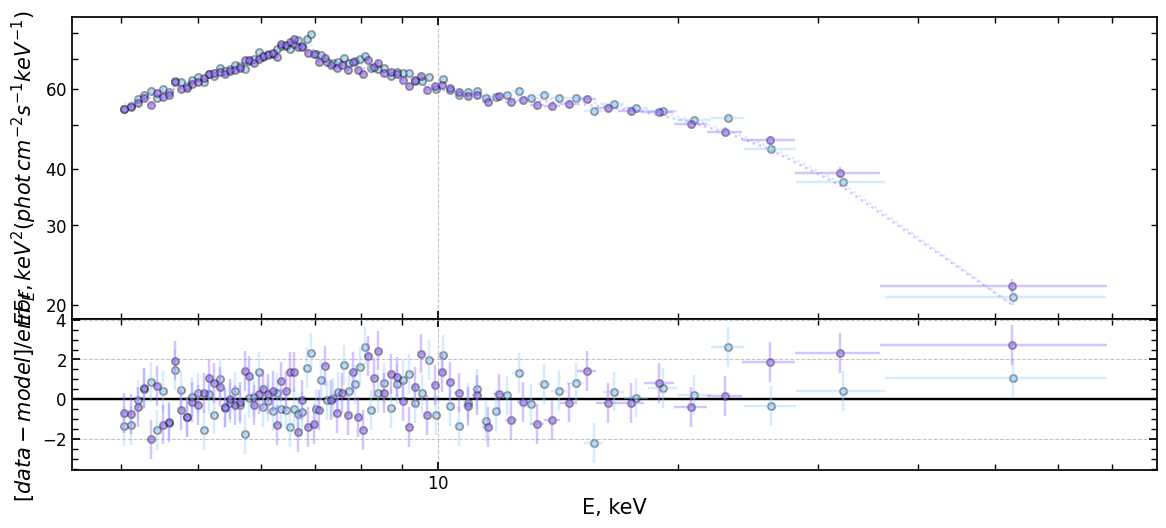

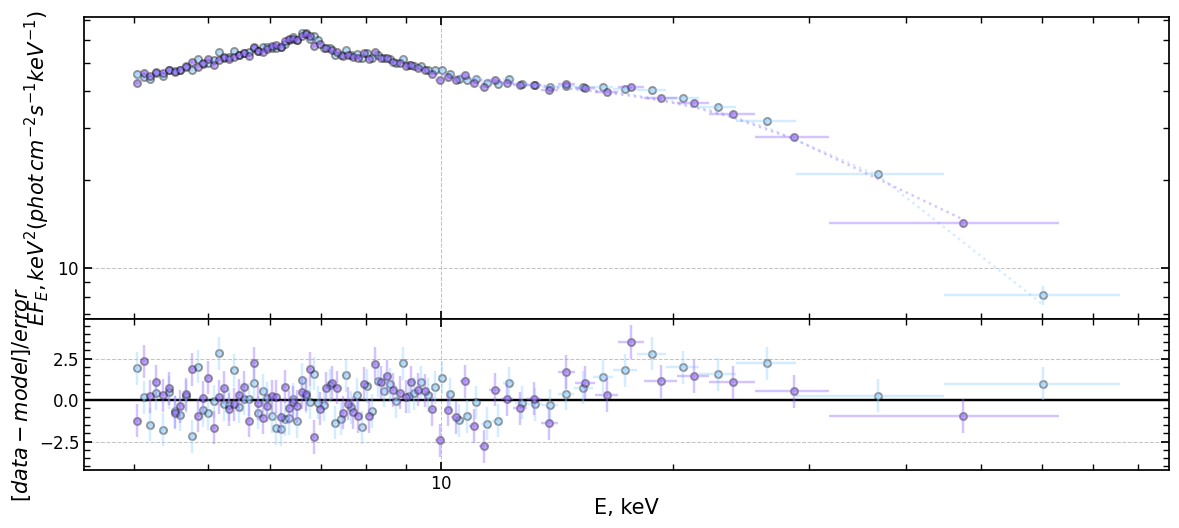

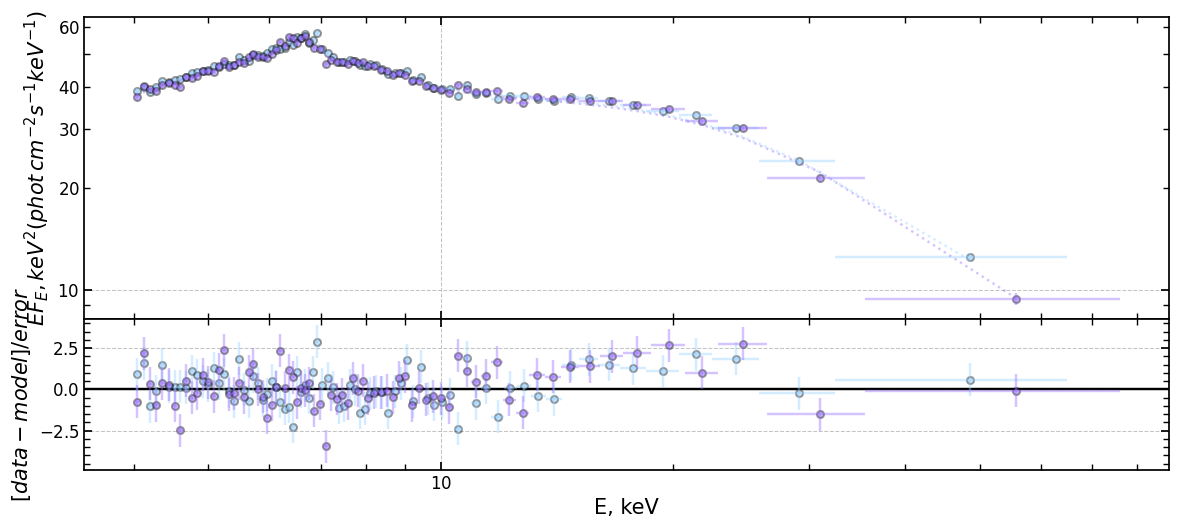

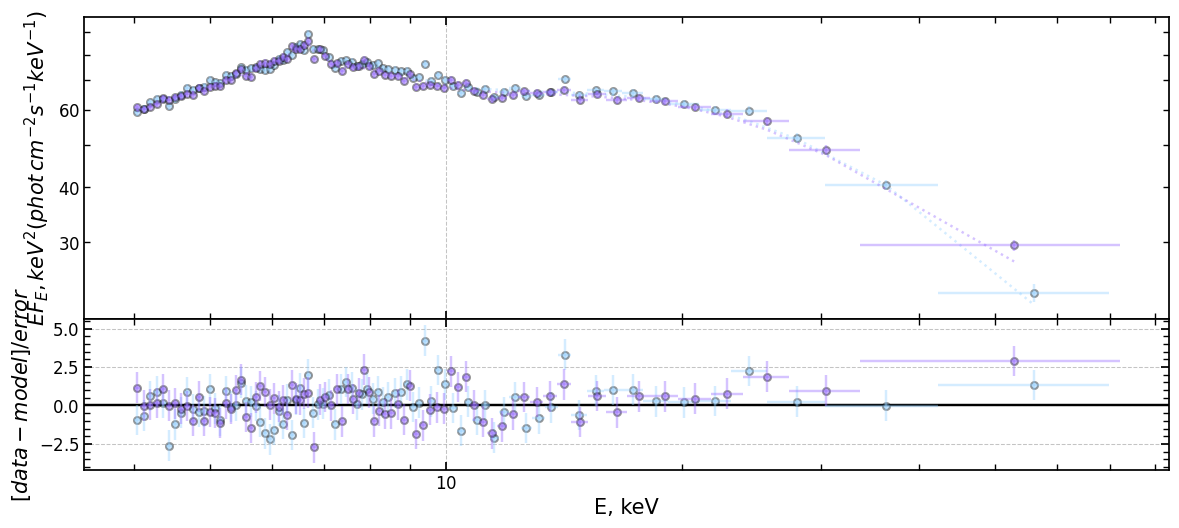

In [4]:
os.chdir(ph_res_folder)
create_dir('xspec')

for binnum in range(6,11):
    print(f'##################### bin number {binnum} #####################')
    binnum = str(binnum)
    bb_pars = fit_spectra(model = model, model_name = model_name, prefix = f'{ObsID}_bin{binnum}_shift{prod_shift}', dataset=f'phase_resolved_bin{binnum}', rewrite = True, calc_errors=calc_errors, eqw_comps='')


#### plot results

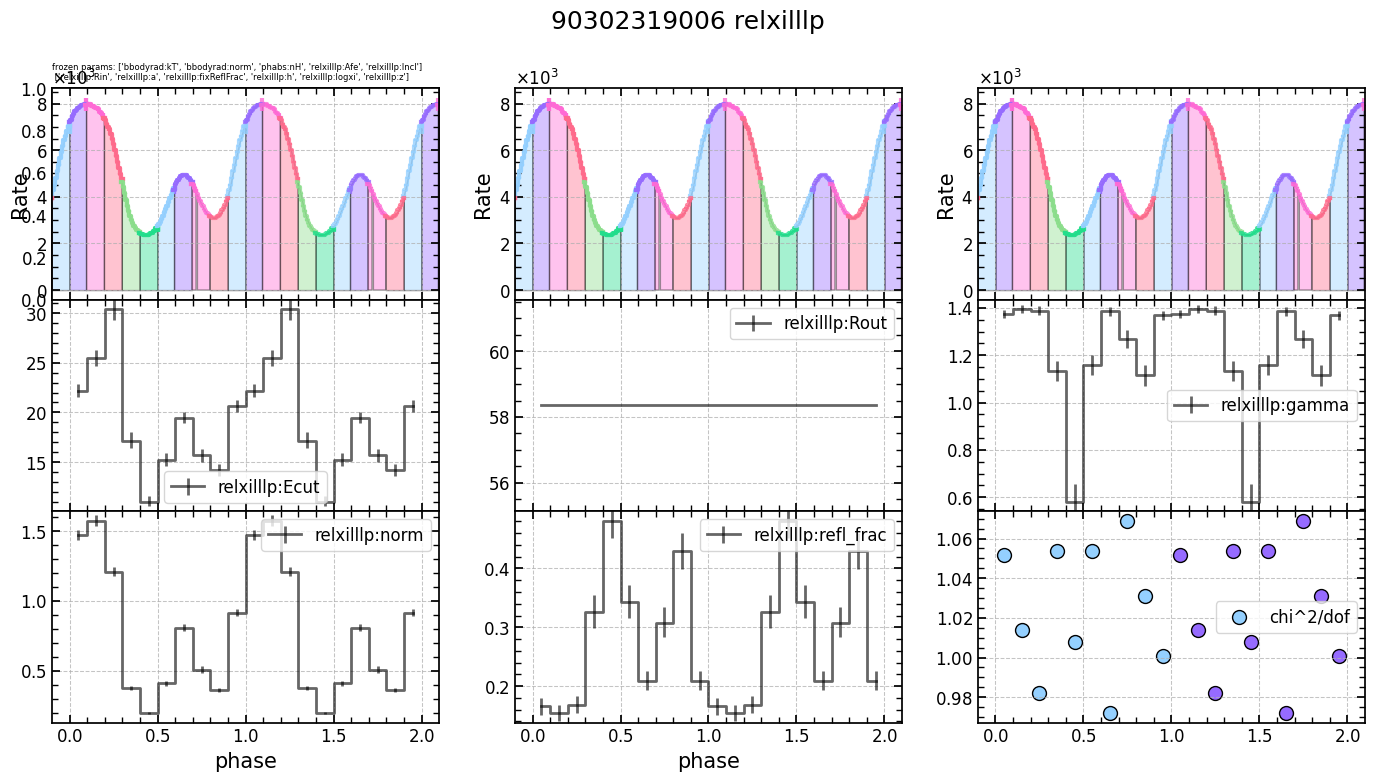

In [5]:
os.chdir(ph_res_folder)
ph_res_results_reind = scan_containers_ph_res(model_name)
ph_res_results_reind = ph_res_results_reind.sort_index()
#ph_res_results_reind.head(25)
plot_ph_res_storage(ph_res_results_reind, nu_obs, 'phase_resolved');


In [12]:
from scipy import stats
print(stats.chi2.sf(5732.10,5465)*1e3)
print(stats.chi2.sf(5748.80,5469)*1e3)


print(stats.chi2.sf(5216.04,5001)*1e3)
print(stats.chi2.sf(5034,5005)*1e3)

#Chi-Squared                 5732.10     using 5489 bins.
#ull hypothesis probability of 5.86e-03 with 5465 degrees of freedom


5.855795719885036
4.177497713321815
16.72004601573077
383.63132448543183
